# Exploring the MNIST Digits Dataset

## Importing Data

In [1]:
!pip3 install --quiet kfp==1.8.22 tensorflow==2.3.0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

2023-08-10 13:48:51.708972: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2023-08-10 13:48:51.709020: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


11493376/11490434 [==============================] - 1s 0us/step


In [21]:
!mkdir -p py_src

## Exploring Data

In [2]:
#%load py_src/print_data.py
#%%save py_src/print_data.py

# check shape of the data

def print_data(_x_train, _y_train, _x_test, _y_test):
    x_train, y_train, x_test, y_test =_x_train, _y_train, _x_test, _y_test
    print(f"x_train shape: {x_train.shape}")
    print(f"y_train shape: {y_train.shape}")

    print(f"x_test shape: {x_test.shape}")
    print(f"y_test shape: {y_test.shape}")



In [32]:
print_data(x_train, y_train, x_test, y_test)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


In [3]:
# %load py_src/visualize_digit.py
#%load py_src/visualize_digit.py
#%%save
# visualize single data instances
def visualize_digit(img_no=0):
    # img_no = 0 #change the number to display other examples

    first_number = x_train[img_no]
    plt.imshow(first_number, cmap='gray') # visualize the numbers in gray mode
    plt.show()
    print(f"correct number: {y_train[img_no]}")


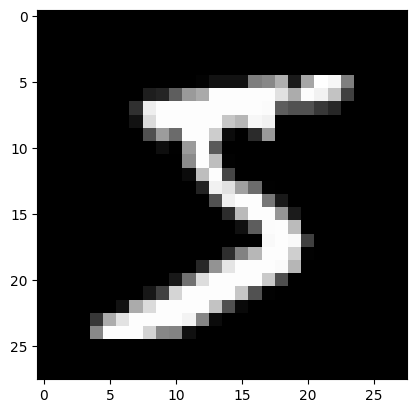

correct number: 5


In [4]:
visualize_digit(0)

## Preparing Data & Splitting

In [5]:
# %load py_src/reshape_train_data.py
#%load py_src/reshape_train_data.py
#%%file
def reshape_train_data(_x_train,  _x_test):
    # reshaping the data
    # reshaping pixels in a 28x28px image with greyscale, canal = 1. This is needed for the Keras API
    _x_train = _x_train.reshape(-1,28,28,1)
    _x_test = _x_test.reshape(-1,28,28,1)

    # normalizing the data
    # each pixel has a value between 0-255. Here we divide by 255, to get values from 0-1
    _x_train = _x_train / 255
    _x_test = _x_test / 255

    return _x_train, _x_test



In [6]:
x_train,  x_test = reshape_train_data(x_train,  x_test )
print(f"train X shape: {x_train.shape}")
print(f"test X shape: {x_test.shape}")

train X shape: (60000, 28, 28, 1)
test X shape: (10000, 28, 28, 1)


## Model Building

In [7]:
# %load py_src/build_model.py
#%load py_src/build_model.py
#%%file
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)))
    model.add(keras.layers.MaxPool2D(2, 2))

    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPool2D(2, 2))

    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPool2D(2, 2))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))

    model.add(keras.layers.Dense(32, activation='relu'))

    model.add(keras.layers.Dense(10, activation='softmax')) #output are 10 classes, numbers from 0-9
    return model



In [8]:
model = build_model()
#show model summary - how it looks
model.summary()

2023-08-10 13:49:18.444396: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-10 13:49:18.444442: W tensorflow/stream_executor/cuda/cuda_driver.cc:312] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-10 13:49:18.444489: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (notebook-sample-v1alpha1-0): /proc/driver/nvidia/version does not exist
2023-08-10 13:49:18.444728: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-10 13:49:18.493317: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Freque

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [9]:
# %load py_src/compile_model.py
#%load py_src/compile_model.py
#%%file
#compile the model - we want to have a multiple outcome
def compile_model(_model):
    _model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])


In [10]:
compile_model(model)

In [11]:
model.save("/tmp/my_model.keras")
model = keras.models.load_model("/tmp/my_model.keras")


In [12]:
# %load py_src/fit_model.py
#%load py_src/fit_model.py
#%%file
def fit_model(_model, x_train, y_train):
    #fit the model and return the history while training
    history = _model.fit(
      x=x_train,
      y=y_train,
      epochs=1
    )
    return history


In [13]:
history = fit_model(model, x_train, y_train)


2023-08-10 13:50:01.513032: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 188160000 exceeds 10% of free system memory.


1134/1875 [=================>............] - ETA: 1:08 - loss: 0.2756 - accuracy: 0.0979

KeyboardInterrupt: 

In [56]:
# %load py_src/save_model.py
#%load py_src/save_model.py
#%%file
saved_model_name="models/detect-digits"

def save_model(_model, model_path):
    keras.models.save_model(_model,model_path)


In [54]:
save_model(model, saved_model_name)

INFO:tensorflow:Assets written to: models/detect-digits/assets


## Model Evaluation

In [59]:
# %load py_src/get_minio_url.py
#%load py_src/get_minio_url.py
#%%file
import os
def get_minio_url():
    minio_host, minio_port = os.environ["MINIO_SERVICE_SERVICE_HOST"], os.environ["MINIO_SERVICE_SERVICE_PORT_HTTP"]
    minio_url= "{}:{}".format(minio_host, minio_port)
    return minio_url



In [60]:
minio_url = get_minio_url()
print(minio_url)

10.152.183.21:9000


In [61]:
from minio import Minio

BUCKET_NAME="datapipeline-023"

config = {
    "endpoint": minio_url,
    "access_key": "minio",
    "secret_key": "minio123",
    "secure": False,
    }


# Create a client with the MinIO server playground, its access key
# and secret key.
print ("connecting to minio {}".format(minio_url))
minio_client = Minio(**config)
print("connected")

connecting to minio 10.152.183.21:9000
connected


In [62]:
print("try to find bucket {}".format(BUCKET_NAME))
found = minio_client.bucket_exists(BUCKET_NAME)
print("found", found)
if not found:
    print("creating the bucket {}".format(BUCKET_NAME))
    minio_client.make_bucket(BUCKET_NAME)
else:
    print("Bucket '{}' already exists".format(BUCKET_NAME))

try to find bucket datapipeline-023
found True
Bucket 'datapipeline-023' already exists


In [63]:
minio_bucket = BUCKET_NAME

In [65]:
# %load py_src/upload_local_directory_to_minio.py
#%load py_src/upload_local_directory_to_minio.py
#%%file

from minio import Minio
import os
import glob



def upload_local_directory_to_minio(local_path, bucket_name, minio_path):
    assert os.path.isdir(local_path)

    for local_file in glob.glob(local_path + '/**'):
        local_file = local_file.replace(os.sep, "/") # Replace \ with / on Windows
        if not os.path.isfile(local_file):
            upload_local_directory_to_minio(
                local_file, bucket_name, minio_path + "/" + os.path.basename(local_file))
        else:
            remote_path = os.path.join(
                minio_path, local_file[1 + len(local_path):])
            remote_path = remote_path.replace(
                os.sep, "/")  # Replace \ with / on Windows
            minio_client.fput_object(bucket_name, remote_path, local_file)
            


In [66]:
upload_local_directory_to_minio(saved_model_name,minio_bucket,saved_model_name)

In [67]:
#load model if already trained
# model = keras.models.load_model("detect-digits.h5")
if os.path.exists(saved_model_name)==False:
    keras.models.save_model(model,saved_model_name)
else:
    model = keras.models.load_model(saved_model_name)

In [68]:
# Test the model against the test dataset
# Returns the loss value & metrics values for the model in test mode.
model_loss, model_accuracy = model.evaluate(x=x_test,y=y_test)

313/313 [==============================] - 1s 5ms/step - loss: 2.3011 - accuracy: 0.0000e+00


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual')]

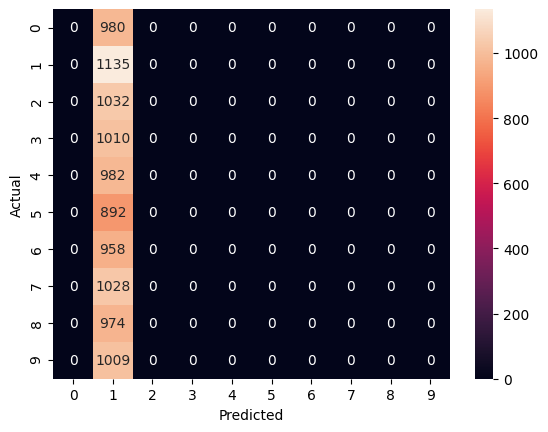

In [69]:
# Confusion Matrix

# Generates output predictions for the input samples.
test_predictions = model.predict(x=x_test)

# Returns the indices of the maximum values along an axis.
test_predictions = np.argmax(test_predictions,axis=1) # the prediction outputs 10 values, we take the index number of the highest value, which is the prediction of the model

# generate confusion matrix
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=test_predictions)

# plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
h = sns.heatmap(confusion_matrix,annot=True,fmt='d')
h.set(xlabel='Predicted', ylabel='Actual')